<a href="https://colab.research.google.com/github/onyeogulu/Machine-Learning-in-R/blob/main/Coursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import the libraries 
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV, GroupKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn import metrics
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import ShuffleSplit
from mlxtend.plotting import plot_confusion_matrix

In [ ]:
# read the various txt files need for this project into a dataframe using pandas library

# read the a_affirmative predictor variables 
a_affirmative=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/grammatical_facial_expression/a_affirmative_datapoints.txt",delim_whitespace=True, header = 0)
# read the a_affirmative target variable
a_affirmative_target=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/grammatical_facial_expression/a_affirmative_targets.txt",delim_whitespace=True, names = ['target'])
# read the b_affirmative predictor variables 
b_affirmative=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/grammatical_facial_expression/b_affirmative_datapoints.txt",delim_whitespace=True, header = 0)
# read the a_affirmative target variable
b_affirmative_target=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/grammatical_facial_expression/b_affirmative_targets.txt",delim_whitespace=True, names = ['target'])

# read the a_conditional predictor variables 
a_conditional=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/grammatical_facial_expression/a_conditional_datapoints.txt",delim_whitespace=True, header = 0)
# read the a_conditional target variable
a_conditional_target=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/grammatical_facial_expression/a_conditional_targets.txt",delim_whitespace=True, names = ['target'])
# read the b_conditional predictor variables 
b_conditional=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/grammatical_facial_expression/b_conditional_datapoints.txt",delim_whitespace=True, header = 0)
# read the b_conditional target variable
b_conditional_target=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/grammatical_facial_expression/b_conditional_targets.txt",delim_whitespace=True, names = ['target'])


# Exploratory Data Analysis

In [ ]:
# concatenate the predictor and target varaiable of a_affirmative dataset
df_a_affirmative = pd.concat([a_affirmative_target,a_affirmative], axis = 1)
df_a_affirmative.head()

,target,0.0,0x,0y,0z,1x,1y,1z,2x,2y,...,96z,97x,97y,97z,98x,98y,98z,99x,99y,99z
0,0,1.390385e+09,244.672,208.182,895,240.949,205.708,890,235.994,205.018,...,923,283.559,186.549,944,291.722,189.204,0,296.547,192.722,1019
1,0,1.390385e+09,265.953,195.731,1016,262.556,193.301,1007,258.243,192.547,...,1050,301.606,176.421,1069,308.776,180.199,0,312.501,184.498,0
2,0,1.390385e+09,272.755,192.786,1060,269.481,190.460,1056,265.371,189.756,...,1097,307.299,174.126,1114,314.125,177.992,1140,317.529,182.324,1179
3,0,1.390385e+09,281.890,190.533,1129,278.861,188.023,1129,274.899,187.213,...,1167,315.525,176.009,1187,322.016,180.029,0,325.041,184.442,1252
4,0,1.390385e+09,283.933,193.201,1159,280.955,190.877,1159,277.180,190.196,...,1195,315.102,177.654,1216,321.384,181.259,1225,324.488,185.400,1284


In [ ]:
# concatenate the predictor and target varaiable of b_affirmative dataset
df_b_affirmative = pd.concat([b_affirmative_target,b_affirmative], axis = 1)
df_b_affirmative.head()

,target,0.0,0x,0y,0z,1x,1y,1z,2x,2y,...,96z,97x,97y,97z,98x,98y,98z,99x,99y,99z
0,0,1.391186e+09,324.085,231.321,1238,321.611,230.081,1252,318.357,229.885,...,1265,347.484,217.486,1270,352.405,217.471,1275,356.369,218.587,1280
1,0,1.391186e+09,325.042,232.960,1229,322.540,231.682,1238,319.250,231.440,...,1256,348.535,219.040,1261,353.495,218.860,1270,357.560,219.882,1275
2,0,1.391186e+09,326.222,233.852,1225,323.708,232.524,1234,320.406,232.243,...,1256,349.667,219.710,1256,354.607,219.465,1265,358.701,220.461,1270
3,0,1.391186e+09,326.435,233.941,1221,323.863,232.417,1238,320.452,232.060,...,1256,350.265,219.803,1256,355.369,219.692,1265,359.512,220.809,1275
4,0,1.391186e+09,326.484,233.884,1225,323.915,232.360,1234,320.507,232.001,...,1256,350.306,219.774,1256,355.406,219.665,1256,359.546,220.785,1275


In [ ]:
# concatenate the predictor and target varaiable of a_conditional dataset
df_a_conditional = pd.concat([a_conditional_target,a_conditional], axis = 1)
df_a_conditional.head()

,target,0.0,0x,0y,0z,1x,1y,1z,2x,2y,...,96z,97x,97y,97z,98x,98y,98z,99x,99y,99z
0,0,1.390386e+09,288.291,196.658,952,284.633,194.087,949,279.925,193.473,...,998,326.399,174.863,1016,334.099,178.847,1031,337.759,183.530,0
1,0,1.390386e+09,291.219,194.493,1050,287.946,192.389,1056,283.859,191.894,...,1086,324.820,173.889,1097,331.478,177.171,1118,334.878,181.109,1118
2,0,1.390386e+09,291.398,193.776,1097,288.301,191.658,1100,284.453,191.070,...,1129,323.740,174.643,1140,329.999,178.003,1159,333.180,181.941,0
3,0,1.390386e+09,291.321,193.601,1114,288.313,191.549,1118,284.600,190.964,...,1151,322.808,175.134,1163,328.861,178.410,1175,331.992,182.232,0
4,0,1.390386e+09,290.924,193.438,1129,288.036,191.480,1136,284.489,190.936,...,1163,321.039,175.811,1179,326.800,178.846,1187,329.841,182.460,1187


In [ ]:
# concatenate the predictor and target varaiable of b_conditional dataset
df_b_conditional = pd.concat([b_conditional_target,b_conditional], axis = 1)
df_b_conditional.head()

,target,0.0,0x,0y,0z,1x,1y,1z,2x,2y,...,96z,97x,97y,97z,98x,98y,98z,99x,99y,99z
0,0,1.391187e+09,333.114,224.122,0,330.330,222.455,1221,326.965,221.856,...,1256,360.601,213.943,1261,365.412,216.021,1270,368.163,218.791,1275
1,0,1.391187e+09,331.781,224.116,1225,329.432,221.980,1229,326.160,221.066,...,1252,358.070,213.141,1256,363.059,214.966,1270,366.286,217.550,1270
2,0,1.391187e+09,331.507,224.043,1225,329.133,221.875,1225,325.836,220.939,...,1256,357.723,213.181,1256,362.794,215.028,1270,366.110,217.642,1270
3,0,1.391187e+09,330.614,224.195,1229,328.199,222.158,1234,324.895,221.329,...,1256,356.612,212.685,1256,361.716,214.173,1270,365.185,216.520,1275
4,0,1.391187e+09,328.491,224.306,1229,326.061,222.545,1234,322.813,221.958,...,1261,353.347,211.560,1261,358.350,212.406,1270,361.970,214.294,1275


In [ ]:
# print the shape of the a_affirmative dataframe
df_a_affirmative.shape

(1062, 302)

In [ ]:
# print the shape of the b_affirmative dataframe
df_b_affirmative.shape

(1074, 302)

In [ ]:
# print the shape of the a_conditional dataframe
df_a_conditional.shape

(1907, 302)

In [ ]:
# print the shape of the b_conditional dataframe
df_b_conditional.shape

(2034, 302)

In [ ]:
# print the shape of the a_affirmative target variable
a_affirmative_target.shape

(1062, 1)

# Drop irrelevant Columns

In [ ]:
# drop he first column of the dataset
df_a_affirmative.drop('0.0', axis=1, inplace=True)
df_b_affirmative.drop('0.0', axis=1, inplace=True)
df_a_conditional.drop('0.0', axis=1, inplace=True)
df_b_conditional.drop('0.0', axis=1, inplace=True)

In [ ]:
# checking for missing values in a_affirmative dataset 
df_a_affirmative.isnull().sum().sum()

0

In [ ]:
# checking for missing values in b_affirmative dataset 
df_b_affirmative.isnull().sum().sum()

0

In [ ]:
# checking for missing values in a_conditional dataset 
df_a_conditional.isnull().sum().sum()

0

In [ ]:
# checking for missing values in b_conditional dataset 
df_b_conditional.isnull().sum().sum()

0

0    648
1    414
Name: target, dtype: int64


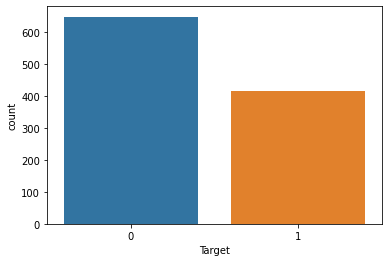

<Figure size 432x288 with 0 Axes>

In [ ]:
 from google.colab import files
 # count plot on target categorical variable to check for imbalance in the a_affirmative_target data
print(df_a_affirmative.target.value_counts())
sns.countplot(x ='target', data = df_a_affirmative)
plt.xlabel("Target")
# Show the plot
plt.show()
plt.savefig('a_affirmative_target.png')
#files.download('a_affirmative_target.png')

0    546
1    528
Name: target, dtype: int64


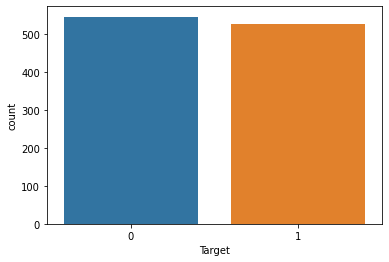

<Figure size 432x288 with 0 Axes>

In [ ]:
 # count plot on target categorical variable to check for imbalance in the b_affirmative_target data
 print(df_b_affirmative.target.value_counts())
sns.countplot(x ='target', data = df_b_affirmative)
plt.xlabel("Target")
 
# Show the plot
plt.show()
plt.savefig('b_affirmative_target.png')
#files.download('b_affirmative_target.png')

0    1359
1     548
Name: target, dtype: int64


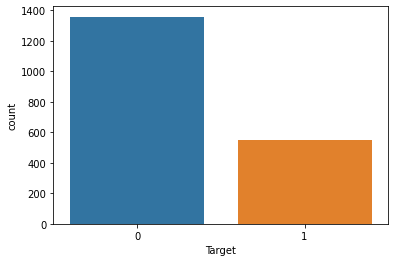

<Figure size 432x288 with 0 Axes>

In [ ]:
 # count plot on target categorical variable to check for imbalance in the a_conditional_target data
 print(df_a_conditional.target.value_counts())
sns.countplot(x ='target', data = df_a_conditional)
plt.xlabel("Target")
 
# Show the plot
plt.show()
plt.savefig('a_conditional_target.png')
#files.download('a_conditional_target.png')

0    1359
1     548
Name: target, dtype: int64


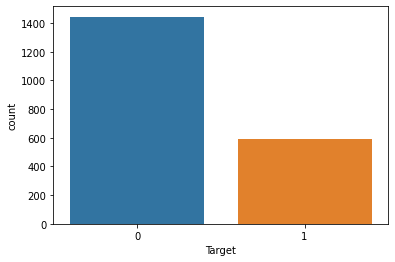

<Figure size 432x288 with 0 Axes>

In [ ]:
 # count plot on target categorical variable to check for imbalance in the b_conditional_target data
print(df_a_conditional.target.value_counts())
sns.countplot(x ='target', data = df_b_conditional)
plt.xlabel("Target")
 
# Show the plot
plt.show()
plt.savefig('b_conditional_target.png')
#files.download('b_conditional_target.png')

#Machine Learning Model Building and Model Evaluation

# SVC model without GridSearch CV

In [ ]:
from sklearn.pipeline import make_pipeline

def model(train_x,train_y,test_x,test_y):
  clf = make_pipeline(StandardScaler(),SVC(probability=True))
  # train model on training set
  clf.fit(train_x,train_y)

  # get modl parameters 
  print("Model parametrs is:",clf.get_params(['svc__C']))
  # model prediction 
  y_pred = clf.predict(test_x)
  # plot confusion matrix for the model prediction
  fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(test_y,y_pred), figsize=(6, 6), cmap=plt.cm.Greens)
  plt.xlabel('Predictions', fontsize=18)
  plt.ylabel('Actuals', fontsize=18)
  plt.title('Confusion Matrix', fontsize=18)
  plt.show()
  print(classification_report(test_y, y_pred))
  # creating ROC and AUC for the model
  #define metrics
  y_pred_proba = clf.predict_proba(test_x)[::,1]
  fpr, tpr, _ = metrics.roc_curve(test_y,  y_pred_proba)
  auc = metrics.roc_auc_score(test_y, y_pred_proba)

  #create ROC curve
  plt.plot(fpr,tpr,label="AUC="+str(round(auc,3)))
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.legend(loc=4)
  plt.title("Plot of ROC cure and AUC score")
  plt.show()

## Implementing the SVC model without GridSearch CV on imbalance dataset

Model parametrs is: {'memory': None, 'steps': [('standardscaler', StandardScaler()), ('svc', SVC(probability=True))], 'verbose': False, 'standardscaler': StandardScaler(), 'svc': SVC(probability=True), 'standardscaler__copy': True, 'standardscaler__with_mean': True, 'standardscaler__with_std': True, 'svc__C': 1.0, 'svc__break_ties': False, 'svc__cache_size': 200, 'svc__class_weight': None, 'svc__coef0': 0.0, 'svc__decision_function_shape': 'ovr', 'svc__degree': 3, 'svc__gamma': 'scale', 'svc__kernel': 'rbf', 'svc__max_iter': -1, 'svc__probability': True, 'svc__random_state': None, 'svc__shrinking': True, 'svc__tol': 0.001, 'svc__verbose': False}


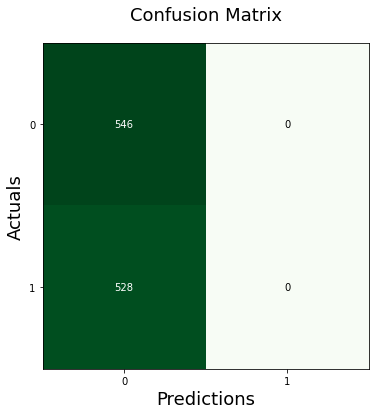

              precision    recall  f1-score   support

           0       0.51      1.00      0.67       546
           1       0.00      0.00      0.00       528

    accuracy                           0.51      1074
   macro avg       0.25      0.50      0.34      1074
weighted avg       0.26      0.51      0.34      1074



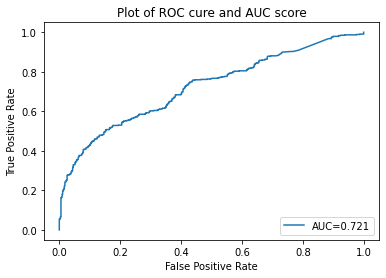

In [ ]:
# SVC model using imbalance dataset (a_affirmative as train set and b_affirmative as test set)
import warnings
warnings.filterwarnings("ignore")
model_01 = model(df_a_affirmative.drop(columns='target'),df_a_affirmative.target,df_b_affirmative.drop(columns='target'),df_b_affirmative.target)

Model parametrs is: {'memory': None, 'steps': [('standardscaler', StandardScaler()), ('svc', SVC(probability=True))], 'verbose': False, 'standardscaler': StandardScaler(), 'svc': SVC(probability=True), 'standardscaler__copy': True, 'standardscaler__with_mean': True, 'standardscaler__with_std': True, 'svc__C': 1.0, 'svc__break_ties': False, 'svc__cache_size': 200, 'svc__class_weight': None, 'svc__coef0': 0.0, 'svc__decision_function_shape': 'ovr', 'svc__degree': 3, 'svc__gamma': 'scale', 'svc__kernel': 'rbf', 'svc__max_iter': -1, 'svc__probability': True, 'svc__random_state': None, 'svc__shrinking': True, 'svc__tol': 0.001, 'svc__verbose': False}


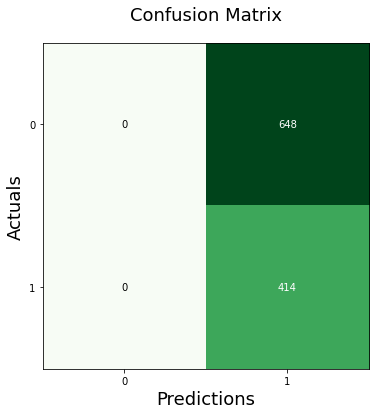

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       648
           1       0.39      1.00      0.56       414

    accuracy                           0.39      1062
   macro avg       0.19      0.50      0.28      1062
weighted avg       0.15      0.39      0.22      1062



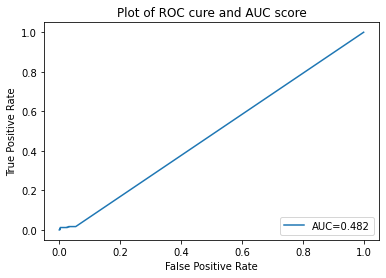

In [ ]:
# SVC model using b_affirmative as train set and a_affirmative as test set
import warnings
warnings.filterwarnings("ignore")
model_02 = model(df_b_affirmative.drop(columns='target'),df_b_affirmative.target,df_a_affirmative.drop(columns='target'),df_a_affirmative.target)

Model parametrs is: {'memory': None, 'steps': [('standardscaler', StandardScaler()), ('svc', SVC(probability=True))], 'verbose': False, 'standardscaler': StandardScaler(), 'svc': SVC(probability=True), 'standardscaler__copy': True, 'standardscaler__with_mean': True, 'standardscaler__with_std': True, 'svc__C': 1.0, 'svc__break_ties': False, 'svc__cache_size': 200, 'svc__class_weight': None, 'svc__coef0': 0.0, 'svc__decision_function_shape': 'ovr', 'svc__degree': 3, 'svc__gamma': 'scale', 'svc__kernel': 'rbf', 'svc__max_iter': -1, 'svc__probability': True, 'svc__random_state': None, 'svc__shrinking': True, 'svc__tol': 0.001, 'svc__verbose': False}


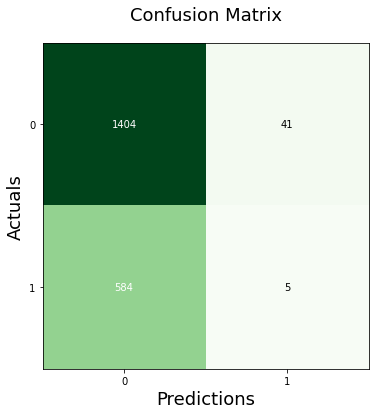

              precision    recall  f1-score   support

           0       0.71      0.97      0.82      1445
           1       0.11      0.01      0.02       589

    accuracy                           0.69      2034
   macro avg       0.41      0.49      0.42      2034
weighted avg       0.53      0.69      0.59      2034



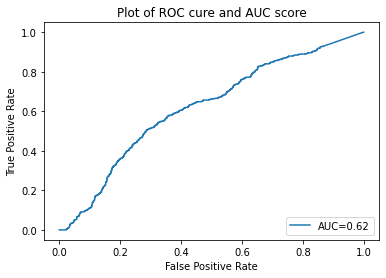

In [ ]:
# SVC model using a_conditional as train set and b_conditional as test set
import warnings
warnings.filterwarnings("ignore")
model_03 = model(df_a_conditional.drop(columns='target'),df_a_conditional.target,df_b_conditional.drop(columns='target'),df_b_conditional.target)

Model parametrs is: {'memory': None, 'steps': [('standardscaler', StandardScaler()), ('svc', SVC(probability=True))], 'verbose': False, 'standardscaler': StandardScaler(), 'svc': SVC(probability=True), 'standardscaler__copy': True, 'standardscaler__with_mean': True, 'standardscaler__with_std': True, 'svc__C': 1.0, 'svc__break_ties': False, 'svc__cache_size': 200, 'svc__class_weight': None, 'svc__coef0': 0.0, 'svc__decision_function_shape': 'ovr', 'svc__degree': 3, 'svc__gamma': 'scale', 'svc__kernel': 'rbf', 'svc__max_iter': -1, 'svc__probability': True, 'svc__random_state': None, 'svc__shrinking': True, 'svc__tol': 0.001, 'svc__verbose': False}


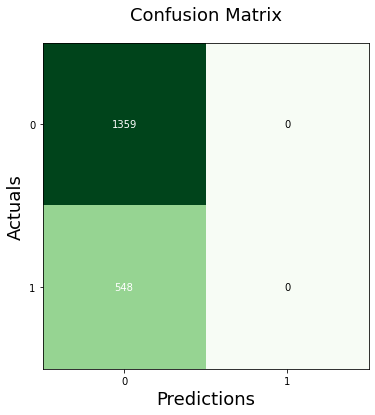

              precision    recall  f1-score   support

           0       0.71      1.00      0.83      1359
           1       0.00      0.00      0.00       548

    accuracy                           0.71      1907
   macro avg       0.36      0.50      0.42      1907
weighted avg       0.51      0.71      0.59      1907



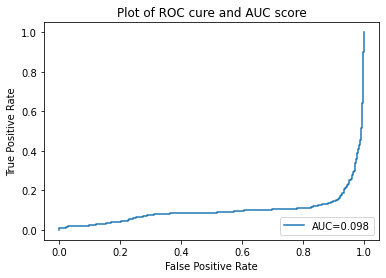

In [ ]:
# SVC model using imbalance dataset (b_conditional as train set and a_conditional as test set)
import warnings
warnings.filterwarnings("ignore")
model_04 = model(df_b_conditional.drop(columns='target'),df_b_conditional.target,df_a_conditional.drop(columns='target'),df_a_conditional.target)

# SVC model with GridSearch CV for Hyparameter Tunning

In [ ]:
# scale the various dataframe using minmax scaler
sc = MinMaxScaler()
# defining turning parameter
tuned_parameters_1 = [{"kernel": ["rbf"], "gamma": [10, 1, 0.1, 0.01, 0.001, 0.0001],
                       "C": [0.1, 1, 10, 100, 1000,10000]},
    {"kernel": ["linear"], "C": [1, 10, 100, 1000,10000]},
    {"kernel": ["poly"], "C": [1, 10, 100, 1000,10000]},]

# Gridsearch cv and model fit for the a_affirmative_sc dataset use as trianing data set
clf = GridSearchCV(SVC(probability=True), tuned_parameters_1, refit = True, scoring="accuracy", cv = 5)

In [ ]:
# function for model building 
def model_fun(train_x,train_y,test_x,test_y):

  # standardised data
  test_x_sc = sc.fit_transform(test_x)
  train_x_sc = sc.fit_transform(train_x)

  # fit the model
  model = clf.fit(train_x_sc, train_y)

  #print best model parameter
  print("Best model parameters:",model.best_params_)
  #print best model score 
  print("Best model score:",model.best_score_)
  
  #plot accuracy score  
  cv_scores = model.cv_results_["mean_test_score"]
  plt.plot(cv_scores)
  plt.ylabel('Accuracy Score')
  plt.xlabel('Cross Validation')
  plt.title("Plot of accuracy score")
  plt.show()

  # model prediction and confusion matrix
  y_pred = model.predict(test_x)
  # plot confusion matrix for the model prediction
  fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(test_y,y_pred), figsize=(6, 6), cmap=plt.cm.Greens)
  plt.xlabel('Predictions', fontsize=18)
  plt.ylabel('Actuals', fontsize=18)
  plt.title('Confusion Matrix', fontsize=18)
  plt.show()
  print(classification_report(test_y, y_pred))

  # creating ROC and AUC for the model
  #define metrics
  y_pred_proba = model.predict_proba(test_x_sc)[::,1]
  fpr, tpr, _ = metrics.roc_curve(test_y,  y_pred_proba)
  auc = metrics.roc_auc_score(test_y, y_pred_proba)

  #create ROC curve
  plt.plot(fpr,tpr,label="AUC="+str(round(auc,3)))
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.legend(loc=4)
  plt.title("Plot of ROC cure and AUC score")
  plt.show()

## Model 1: a_affirmative as training set and b_affirmative as test set

Best model parameters: {'C': 10, 'kernel': 'linear'}
Best model score: 0.8455000442909025


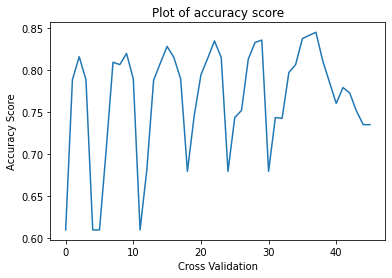

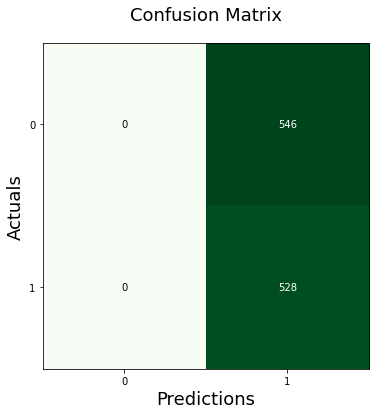

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       546
           1       0.49      1.00      0.66       528

    accuracy                           0.49      1074
   macro avg       0.25      0.50      0.33      1074
weighted avg       0.24      0.49      0.32      1074



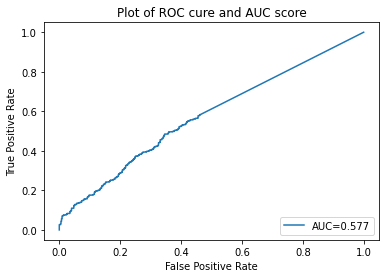

In [ ]:
import warnings
warnings.filterwarnings("ignore")
model_1 = model_fun(df_a_affirmative.drop(columns='target'),df_a_affirmative.target,df_b_affirmative.drop(columns='target'),df_b_affirmative.target)

## Model 2: b_affirmative as training set and a_affirmative as test set

Best model parameters: {'C': 10, 'kernel': 'linear'}
Best model score: 0.7270941099760921


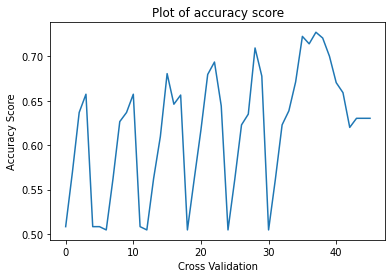

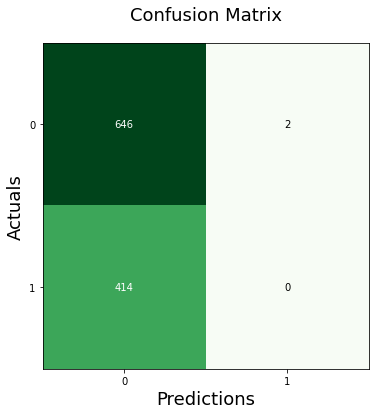

              precision    recall  f1-score   support

           0       0.61      1.00      0.76       648
           1       0.00      0.00      0.00       414

    accuracy                           0.61      1062
   macro avg       0.30      0.50      0.38      1062
weighted avg       0.37      0.61      0.46      1062



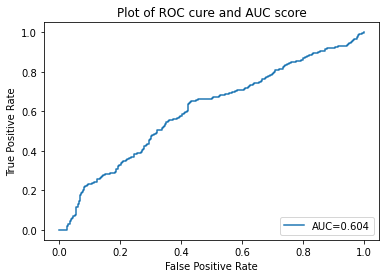

In [ ]:
import warnings
warnings.filterwarnings("ignore")
model_2 = model_fun(df_b_affirmative.drop(columns='target'),df_b_affirmative.target,df_a_affirmative.drop(columns='target'),df_a_affirmative.target)

## Model 3: a_conditional as training set and b_conditional as test set

Best model parameters: {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
Best model score: 0.9690618515617485


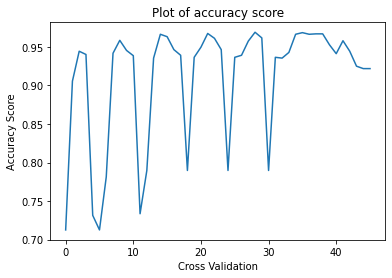

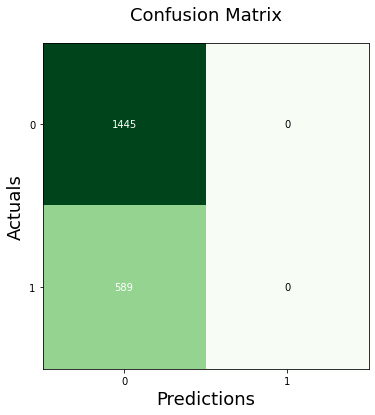

              precision    recall  f1-score   support

           0       0.71      1.00      0.83      1445
           1       0.00      0.00      0.00       589

    accuracy                           0.71      2034
   macro avg       0.36      0.50      0.42      2034
weighted avg       0.50      0.71      0.59      2034



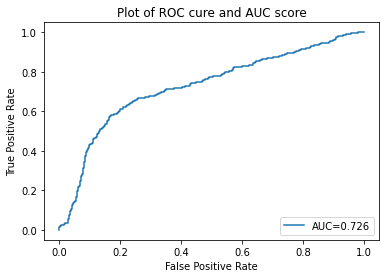

In [ ]:
import warnings
warnings.filterwarnings("ignore")
model_3 = model_fun(df_a_conditional.drop(columns='target'),df_a_conditional.target,df_b_conditional.drop(columns='target'),df_b_conditional.target)

## Model 4: b_conditional as training set and a_conditional as test set

Best model parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best model score: 0.8736011425666597


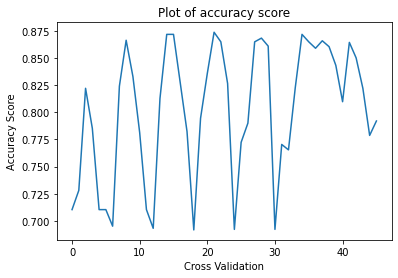

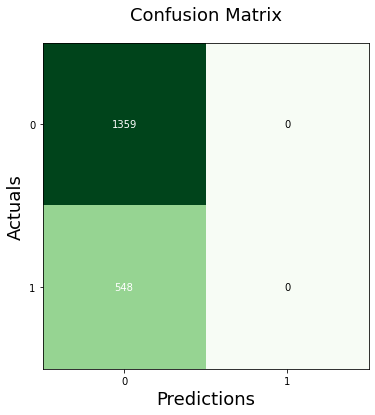

              precision    recall  f1-score   support

           0       0.71      1.00      0.83      1359
           1       0.00      0.00      0.00       548

    accuracy                           0.71      1907
   macro avg       0.36      0.50      0.42      1907
weighted avg       0.51      0.71      0.59      1907



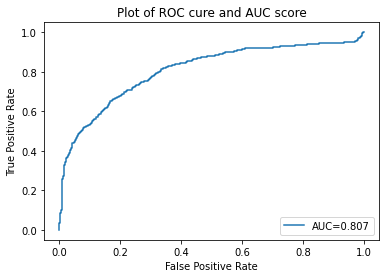

In [ ]:
import warnings
warnings.filterwarnings("ignore")
model_4 = model_fun(df_b_conditional.drop(columns='target'),df_b_conditional.target,df_a_conditional.drop(columns='target'),df_a_conditional.target)

# SVM With Principal Component Analysis

In [ ]:
# python code for plotting the cumulative explained variance 
from sklearn.decomposition import PCA
def Principal_Component(data):
  pca = PCA().fit(data.drop(columns='target'))
  plt.plot(np.cumsum(pca.explained_variance_ratio_))
  plt.xlabel('number of components')
  plt.ylabel('cumulative explained variance');

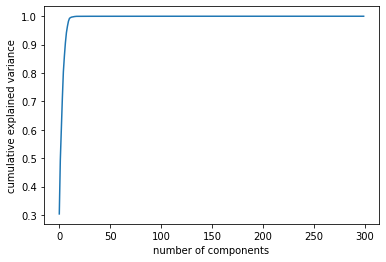

In [ ]:
# cumulative explained variance for a_affirmative
Principal_Component(df_a_affirmative)

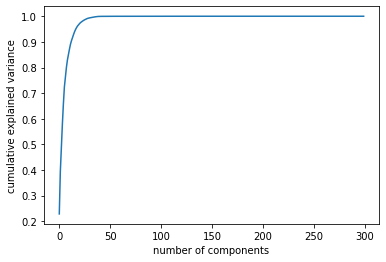

In [ ]:
# cumulative explained variance for b_affirmative
Principal_Component(df_b_affirmative)

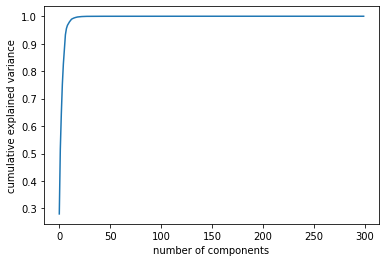

In [ ]:
# cumulative explained variance for a_conditional
Principal_Component(df_a_conditional)

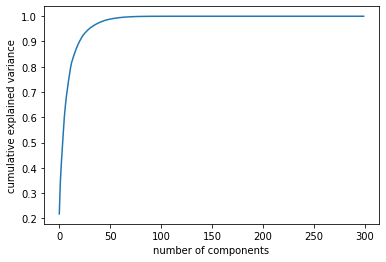

In [ ]:
# cumulative explained variance for b_conditional
Principal_Component(df_b_conditional)

In [ ]:
# python code for PCA with Linear SVC classifier 
def SVM_PCA(data_1, data_2): 
  pca = PCA(n_components=20)
  train = pca.fit_transform(data_1.drop(columns='target'))
  test = pca.fit_transform(data_2.drop(columns='target'))
  clf = SVC(probability=True)
  # train model on training set
  clf.fit(train,data_1.target)

  # get modl parameters 
  print("Model parametrs is:",clf.get_params(['svc__C']))
  # model prediction 
  y_pred = clf.predict(test)
  # plot confusion matrix for the model prediction
  fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(data_2.target,y_pred), figsize=(6, 6), cmap=plt.cm.Greens)
  plt.xlabel('Predictions', fontsize=18)
  plt.ylabel('Actuals', fontsize=18)
  plt.title('Confusion Matrix', fontsize=18)
  plt.show()
  print(classification_report(data_2.target, y_pred))
  # creating ROC and AUC for the model
  #define metrics
  y_pred_proba = clf.predict_proba(test)[::,1]
  fpr, tpr, _ = metrics.roc_curve(data_2.target,  y_pred_proba)
  auc = metrics.roc_auc_score(data_2.target, y_pred_proba)

  #create ROC curve
  plt.plot(fpr,tpr,label="AUC="+str(round(auc,3)))
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.legend(loc=4)
  plt.title("Plot of ROC cure and AUC score")
  plt.show()
 


Model parametrs is: {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


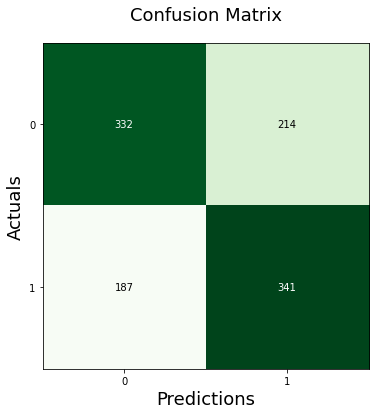

              precision    recall  f1-score   support

           0       0.64      0.61      0.62       546
           1       0.61      0.65      0.63       528

    accuracy                           0.63      1074
   macro avg       0.63      0.63      0.63      1074
weighted avg       0.63      0.63      0.63      1074



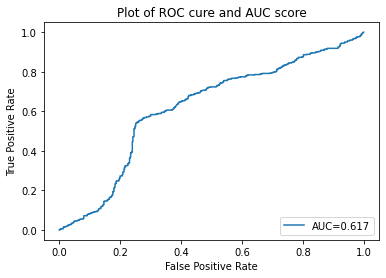

In [ ]:
# python code for PCA with Linear SVC classifier for a_affirmative as trianing set and b_affirmative as test set
SVM_PCA(df_a_affirmative,df_b_affirmative)

Model parametrs is: {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


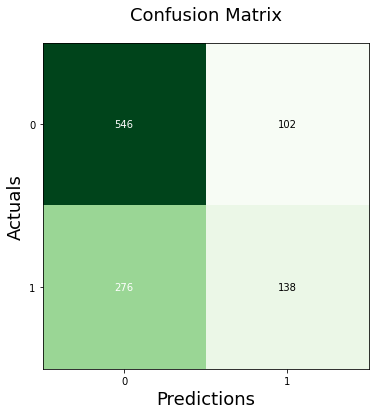

              precision    recall  f1-score   support

           0       0.66      0.84      0.74       648
           1       0.57      0.33      0.42       414

    accuracy                           0.64      1062
   macro avg       0.62      0.59      0.58      1062
weighted avg       0.63      0.64      0.62      1062



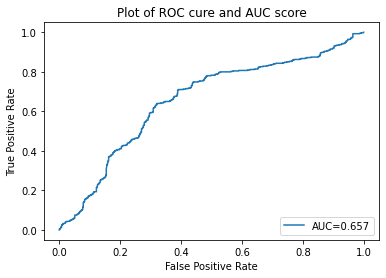

In [ ]:
# python code for PCA with Linear SVC classifier for b_affirmative as trianing set and a_affirmative as test set
SVM_PCA(df_b_affirmative,df_a_affirmative)

Model parametrs is: {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


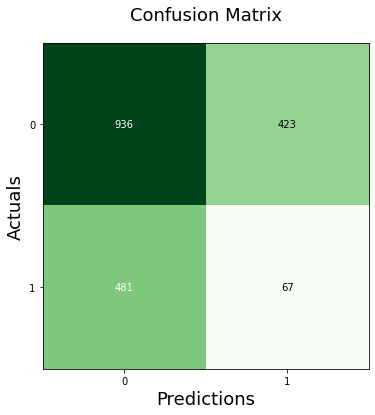

              precision    recall  f1-score   support

           0       0.66      0.69      0.67      1359
           1       0.14      0.12      0.13       548

    accuracy                           0.53      1907
   macro avg       0.40      0.41      0.40      1907
weighted avg       0.51      0.53      0.52      1907



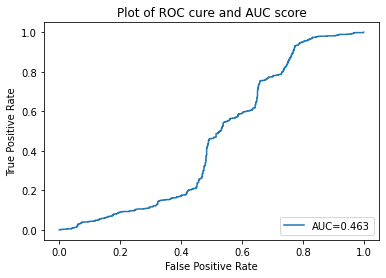

In [ ]:
# python code for PCA with Linear SVC classifier for a_conditional as trianing set and b_conditional as test set
SVM_PCA(df_a_conditional,df_b_conditional)

Model parametrs is: {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


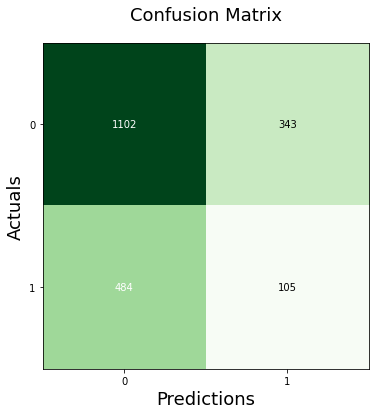

              precision    recall  f1-score   support

           0       0.69      0.76      0.73      1445
           1       0.23      0.18      0.20       589

    accuracy                           0.59      2034
   macro avg       0.46      0.47      0.46      2034
weighted avg       0.56      0.59      0.58      2034



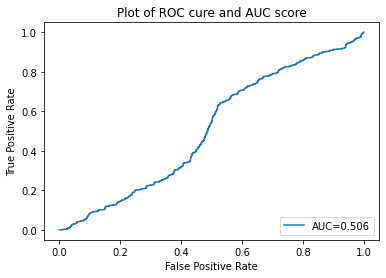

In [ ]:
# python code for PCA with Linear SVC classifier for b_conditional as trianing set and a_conditional as test set
SVM_PCA(df_b_conditional,df_a_conditional)

# Python Code for Artificial Neural Network ANN

In [ ]:
from matplotlib import pyplot
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from tensorflow.keras.utils import to_categorical
import numpy as np

# Artificial Neural Network (ANN)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

def ANN(train_x,train_y,test_x,test_y):
  # code to implement ANN algorithm
  callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
  model = keras.Sequential([                       
  keras.layers.Dense(300, input_shape=(len(train_x.columns),), activation = 'relu'),
  keras.layers.Dense(200, activation='relu'),
  keras.layers.Dropout(0.25),
  keras.layers.Dense(100, activation ='relu'),
  keras.layers.Dropout(0.30),
  keras.layers.Dense(1, activation='sigmoid'),])
  # code to compile model
  model.compile(optimizer='adam',loss='binary_crossentropy',
                metrics =['accuracy'])
  # cdoe to print model summary
  print(model.summary())
  # code to fit the model 
  history = model.fit(train_x,train_y,batch_size=50,epochs=100, validation_split = 0.2, 
                      verbose=2)
  #plot training and validation loss at each epoch
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(1, len(loss)+1)
  plt.plot(epochs, loss,'y',label ='Training loss')
  plt.plot(epochs,val_loss,'r', label = 'Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()
  # code to predict with test data
  pred = model.predict(test_x)
  # plot confusion matrix for the model prediction
  fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(test_y,np.round(pred)), figsize=(6, 6), cmap=plt.cm.Greens)
  plt.xlabel('Predictions', fontsize=18)
  plt.ylabel('Actuals', fontsize=18)
  plt.title('Confusion Matrix', fontsize=18)
  plt.show()
  print(classification_report(test_y, np.round(pred)))
  fpr, tpr, _ = metrics.roc_curve(test_y, pred)
  auc = metrics.roc_auc_score(test_y, pred)
  #create ROC curve
  plt.plot(fpr,tpr,label="AUC="+str(round(auc,3)))
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.legend(loc=4)
  plt.title("Plot of ROC cure and AUC score")
  plt.show()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               90300     
                                                                 
 dense_1 (Dense)             (None, 200)               60200     
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               20100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 170,701
Trainable params: 170,701
Non-trai

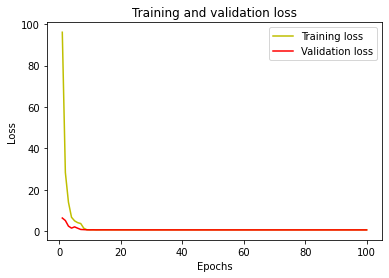

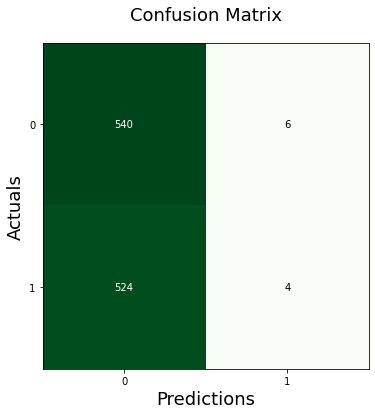

              precision    recall  f1-score   support

           0       0.51      0.99      0.67       546
           1       0.40      0.01      0.01       528

    accuracy                           0.51      1074
   macro avg       0.45      0.50      0.34      1074
weighted avg       0.45      0.51      0.35      1074



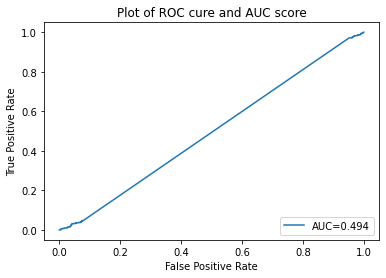

In [ ]:

ANN(df_a_affirmative.drop(columns='target'),df_a_affirmative.target,df_b_affirmative.drop(columns='target'),df_b_affirmative.target)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 300)               90300     
                                                                 
 dense_5 (Dense)             (None, 200)               60200     
                                                                 
 dropout_2 (Dropout)         (None, 200)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               20100     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 170,701
Trainable params: 170,701
Non-tr

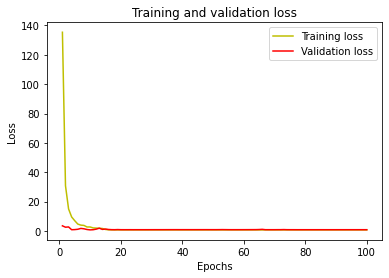

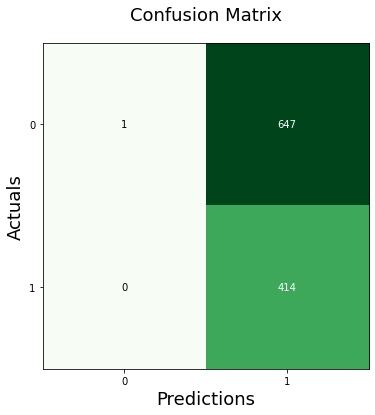

              precision    recall  f1-score   support

           0       1.00      0.00      0.00       648
           1       0.39      1.00      0.56       414

    accuracy                           0.39      1062
   macro avg       0.70      0.50      0.28      1062
weighted avg       0.76      0.39      0.22      1062



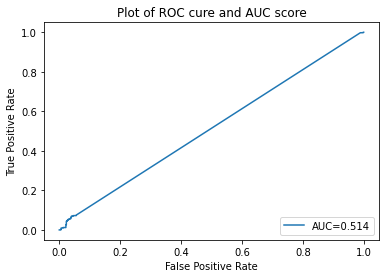

In [ ]:
ANN(df_b_affirmative.drop(columns='target'),df_b_affirmative.target,df_a_affirmative.drop(columns='target'),df_a_affirmative.target)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 300)               90300     
                                                                 
 dense_9 (Dense)             (None, 200)               60200     
                                                                 
 dropout_4 (Dropout)         (None, 200)               0         
                                                                 
 dense_10 (Dense)            (None, 100)               20100     
                                                                 
 dropout_5 (Dropout)         (None, 100)               0         
                                                                 
 dense_11 (Dense)            (None, 1)                 101       
                                                                 
Total params: 170,701
Trainable params: 170,701
Non-tr

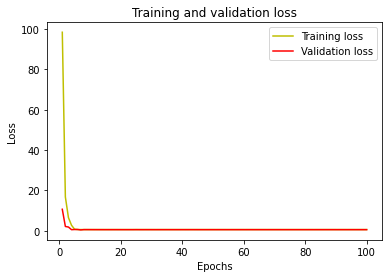

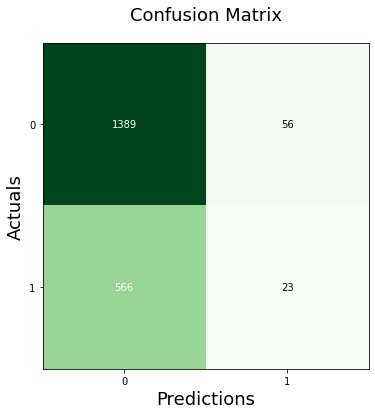

              precision    recall  f1-score   support

           0       0.71      0.96      0.82      1445
           1       0.29      0.04      0.07       589

    accuracy                           0.69      2034
   macro avg       0.50      0.50      0.44      2034
weighted avg       0.59      0.69      0.60      2034



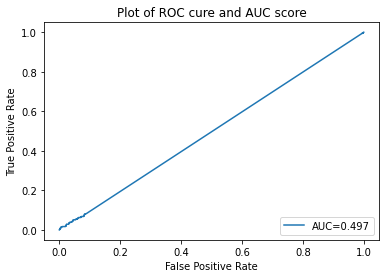

In [ ]:
ANN(df_a_conditional.drop(columns='target'),df_a_conditional.target,df_b_conditional.drop(columns='target'),df_b_conditional.target)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 300)               90300     
                                                                 
 dense_13 (Dense)            (None, 200)               60200     
                                                                 
 dropout_6 (Dropout)         (None, 200)               0         
                                                                 
 dense_14 (Dense)            (None, 100)               20100     
                                                                 
 dropout_7 (Dropout)         (None, 100)               0         
                                                                 
 dense_15 (Dense)            (None, 1)                 101       
                                                                 
Total params: 170,701
Trainable params: 170,701
Non-tr

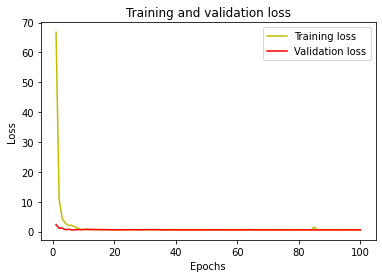

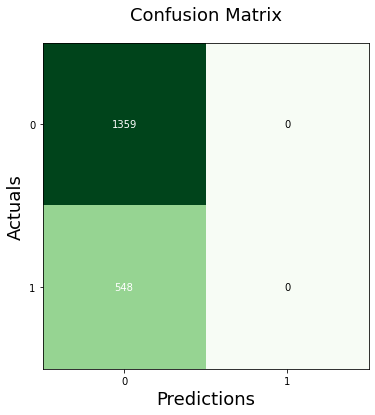

              precision    recall  f1-score   support

           0       0.71      1.00      0.83      1359
           1       0.00      0.00      0.00       548

    accuracy                           0.71      1907
   macro avg       0.36      0.50      0.42      1907
weighted avg       0.51      0.71      0.59      1907



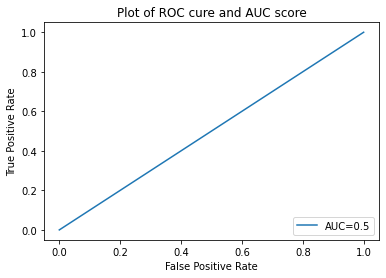

In [ ]:
ANN(df_b_conditional.drop(columns='target'),df_b_conditional.target,df_a_conditional.drop(columns='target'),df_a_conditional.target)

# End